In [ ]:
import pandas as pd
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 69.5 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/UFO complete.csv')
df.drop(columns='Unnamed: 11', inplace=True)

<ipython-input-2-b34e076574b3>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/UFO complete.csv')


In [ ]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [ ]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

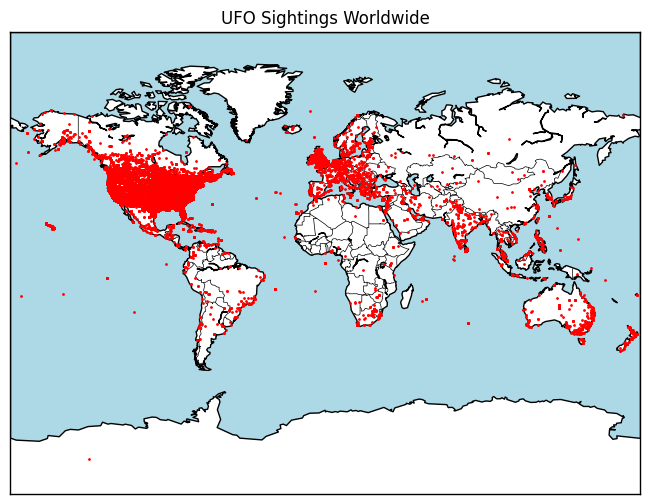

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Convert the 'latitude' column to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df.dropna(subset=['latitude'], inplace=True)

# Create a Basemap object
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Draw coastlines and fill continents
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Convert latitude and latitude to map coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Plot the points
m.scatter(x, y, marker='o', color='red', label='UFO Sightings', zorder=5, s=1)

# Show the map
plt.title('UFO Sightings Worldwide')
plt.show()

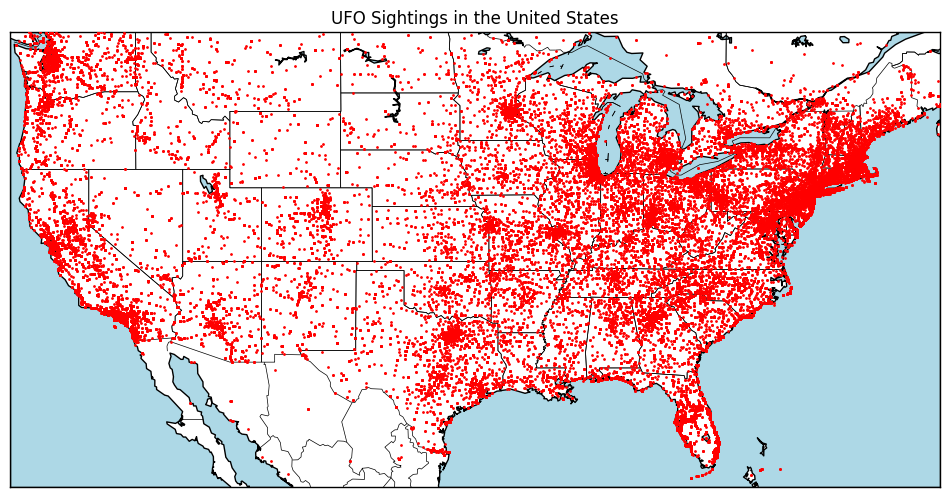

In [ ]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df.dropna(subset=['latitude'], inplace=True)

us_sightings = df[(df['latitude'] >= 24) & (df['latitude'] <= 49) & (df['longitude'] >= -125) & (df['longitude'] <= -66)]

# Create a Basemap object focused on the United States
m = Basemap(
    projection='mill',
    llcrnrlat=24, urcrnrlat=49,
    llcrnrlon=-125, urcrnrlon=-66,
    resolution='l'  # Use 'l' (low) resolution for smoother drawing
)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Draw coastlines and fill continents
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Convert longitude and latitude to map coordinates for US sightings
x, y = m(us_sightings['longitude'].values, us_sightings['latitude'].values)

# Adjust the size of the markers (e.g., set 's' to 10 for smaller points)
m.scatter(x, y, marker='o', color='red', label='UFO Sightings in US', zorder=5, s=1)

# Show the map
plt.title('UFO Sightings in the United States')
plt.show()

Used ChatGPT for maps

In [ ]:
df.groupby('shape')['datetime'].count().sort_values(ascending=False)

shape
light        17872
triangle      8489
circle        8453
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
formation     2657
cigar         2241
changing      2140
flash         1472
rectangle     1417
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
crescent         2
round            2
hexagon          1
pyramid          1
flare            1
dome             1
changed          1
Name: datetime, dtype: int64

In [ ]:
df['Hour of Day'] = df['datetime'].str[-5:-3].astype(float)

In [ ]:
df['Hour of Day'].unique()

array([20., 21., 17., 19., 23., 13., 16., 22., 12.,  2.,  0.,  7.,  5.,
       18.,  3., 15.,  4.,  6., 11.,  9.,  8., 14., 38.,  1., 10., 34.,
       39., 41., 26., 29., 37., 40., 35., 27., 28., 30., 36., 32., 24.,
       33., 31., 25.])

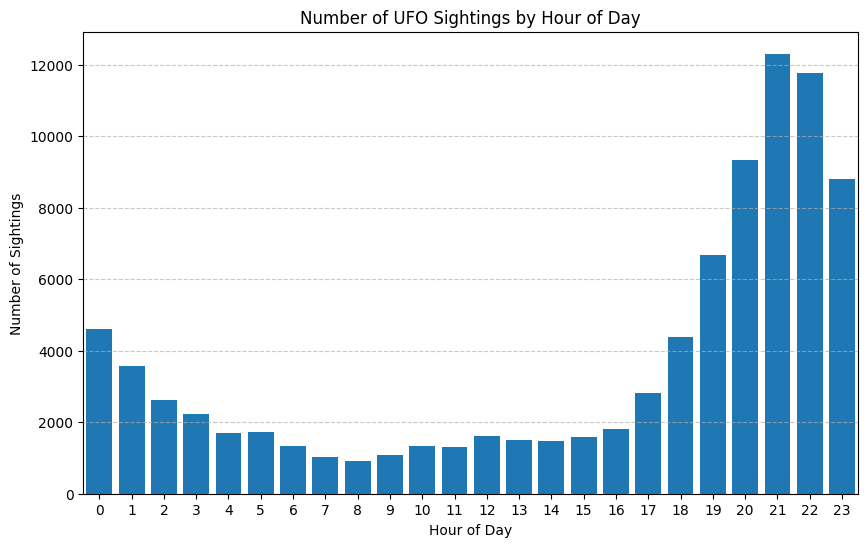

In [ ]:
count = df.groupby('Hour of Day').size()
plt.figure(figsize=(10, 6))
plt.bar(count.index, count.values)
plt.title('Number of UFO Sightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(24))
plt.xlim(-.5, 23.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()